# Comparison between Martin's and Qinxun' GGL physical stacking code

Run
ascii2fits.py -i shear_testsample_lensfit_testformartin -H "idx r[Mpc/h] gt      gterr   gx      gxerr"

In [ ]:
from cs_util import plots

In [51]:
from astropy.io import fits
from astropy import units
import matplotlib.pylab as plt

In [52]:
idx = 0
n_split = 1
weight = 'w'

input_files = [
    f'LF/ggl_agn_{idx}_n_split_{n_split}_{weight}.fits',
    'shear_testsample_lensfit_testformartin.fits',
]

colors = [
    'r',
    'blue',
]    

In [53]:
pwd

'/home/mkilbing/astro/Runs/UNIONS/ggl-agn/jobs/Shen22_and_Liu19_logM_min_7_nz_0_z_0.5_0.8_test_physical'

In [54]:
dat = []
for inpf in input_files:
    this_dat = fits.getdata(inpf)
    dat.append(this_dat)

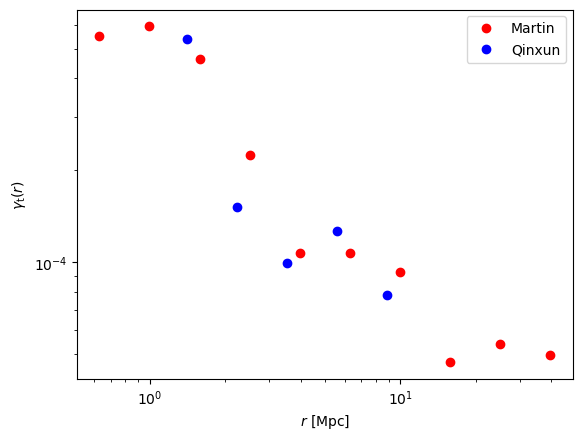

In [56]:
h = 0.68

plt.loglog(
    dat[0]['r_nom'],
    dat[0]['gamT'],
    'o',
    color=colors[0],
    label='Martin',
)

plt.loglog(
    dat[1]['r[Mpc/h]'] / h,
    dat[1]['gt'],
    'o',
    color=colors[1],
    label='Qinxun',
)


plt.legend()
plt.xlabel(r'$r$ [Mpc]')
_ = plt.ylabel(r'$\gamma_{\rm t}(r)$')

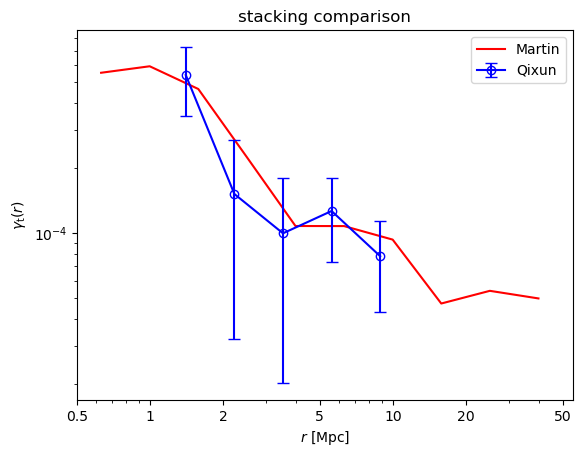

In [57]:
x = [dat[0]['r_nom'], dat[1]['r[Mpc/h]'] / h]
y = [dat[0]['gamT'], dat[1]['gt']]
yerr = [y[0] * np.nan, dat[1]['gterr']]
title = 'stacking comparison'
labels = ['Martin', 'Qixun']
xlabel = r'$r$ [Mpc]'
ylabel = r'$\gamma_{\rm t}(r)$'

plots.plot_data_1d(
    x,
    y,
    yerr,
    title,
    xlabel,
    ylabel,
    xlog=True,
    ylog=True,
    labels=labels,
    colors=colors,
    xlim=[0.5, 55]
)

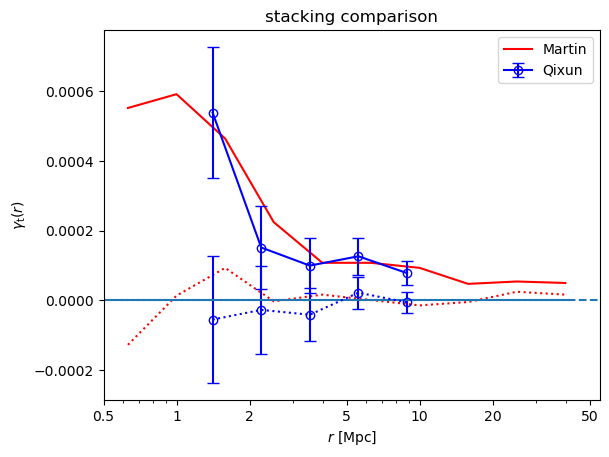

In [58]:
x = [dat[0]['r_nom'], dat[1]['r[Mpc/h]'] / h, dat[0]['r_nom'], dat[1]['r[Mpc/h]'] / h]
y = [dat[0]['gamT'], dat[1]['gt'], dat[0]['gamX'], dat[1]['gx']]
yerr = [y[0] * np.nan, dat[1]['gterr'], y[0] * np.nan, dat[1]['gxerr']]
title = 'stacking comparison'
labels = ['Martin', 'Qixun', '', '']
xlabel = r'$r$ [Mpc]'
ylabel = r'$\gamma_{\rm t}(r)$'
linestyles = ['-', '-', ':', ':'] 

plots.plot_data_1d(
    x,
    y,
    yerr,
    title,
    xlabel,
    ylabel,
    xlog=True,
    ylog=False,
    labels=labels,
    linestyles=linestyles,
    colors=colors * 2,
    xlim=[0.5, 55],
)